Variance of Grades:
G1    10.990516
G2    14.143953
G3    20.894712
dtype: float64


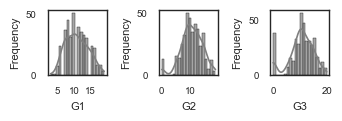

Variance of average grade:
13.640266215510861


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("Math-Students.csv", sep=",")
grades = ['G1', 'G2', 'G3']
numeric = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
           'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
nonNumeric = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason',
          'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
          'higher', 'internet', 'romantic']

# Compute and print variance for G1, G2, G3
variances = data[grades].var()
print("Variance of Grades:")
print(variances)

sns.set_theme(style='white')
sns.set_context("paper")
# Plot distributions of grades
plt.figure(figsize=(3.5, 1.3))
for i, grade in enumerate(grades):
    plt.subplot(1, 3, i + 1)
    sns.histplot(data[grade], kde=True, bins=20, color='gray', alpha=0.7, edgecolor='k', linewidth=0.3)

    plt.xlabel(f'{grade}', fontsize=8)
    plt.ylabel('Frequency', fontsize=8)
    plt.title('', fontsize=10)
    plt.xticks(fontsize=7)
    plt.yticks(fontsize=7)
plt.tight_layout()
plt.savefig('G_Distributions.pdf', dpi=300, bbox_inches='tight')
plt.show()

# Create G_avg
data['G_avg'] = data[grades].mean(axis=1)
print("Variance of average grade:")
print(data['G_avg'].var())
# Drop G1, G2, G3 to avoid leakage
data = data.drop(columns=grades)

In [3]:
numericData = data.select_dtypes(include=["int64", "float64"])

# Find correlated pairs
corr_matrix = numericData.corr()
threshold = 0.100000001
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        corr_value = corr_matrix.iloc[i, j]
        if abs(corr_value) < threshold:
            feature1 = corr_matrix.columns[i]
            feature2 = corr_matrix.columns[j]
            high_corr_pairs.append((feature1, feature2, corr_value))
# Print high correlation pairs
print("Features correlation with high correlation to each other:")
for f1, f2, corr in sorted(high_corr_pairs, key=lambda x: -abs(x[2])):
    print(f"{f1} ({data[f1].corr(data['G_avg']):.2f}), {f2} ({data[f2].corr(data['G_avg']):.2f}): {corr:.2f}")

# Correlation with G_avg
label_corr = corr_matrix['G_avg']
top_corr_threshold = 0.10
print("\nFeatures most correlated with G_avg (>|0.1|):")
print(label_corr[abs(label_corr) > top_corr_threshold].sort_values(key=abs, ascending=False))

Features correlation with high correlation to each other:
famrel (0.01), health (-0.08): 0.10
traveltime (-0.12), failures (-0.37): 0.09
failures (-0.37), freetime (0.01): 0.09
Walc (-0.09), health (-0.08): 0.09
Medu (0.21), absences (0.00): 0.09
Walc (-0.09), G_avg (1.00): -0.09
famrel (0.01), Dalc (-0.07): -0.08
health (-0.08), G_avg (1.00): -0.08
studytime (0.13), health (-0.08): -0.08
Dalc (-0.07), health (-0.08): 0.08
freetime (0.01), health (-0.08): 0.07
Dalc (-0.07), G_avg (1.00): -0.07
failures (-0.37), absences (0.00): 0.07
age (-0.14), famrel (0.01): 0.07
failures (-0.37), health (-0.08): 0.06
Medu (0.21), studytime (0.13): 0.06
age (-0.14), traveltime (-0.12): 0.06
studytime (0.13), goout (-0.14): -0.06
studytime (0.13), absences (0.00): -0.06
age (-0.14), health (-0.08): -0.06
freetime (0.01), absences (0.00): -0.06
famrel (0.01), absences (0.00): -0.05
famrel (0.01), goout (-0.14): 0.05
Medu (0.21), goout (-0.14): 0.05
goout (-0.14), absences (0.00): 0.05
Medu (0.21), Walc

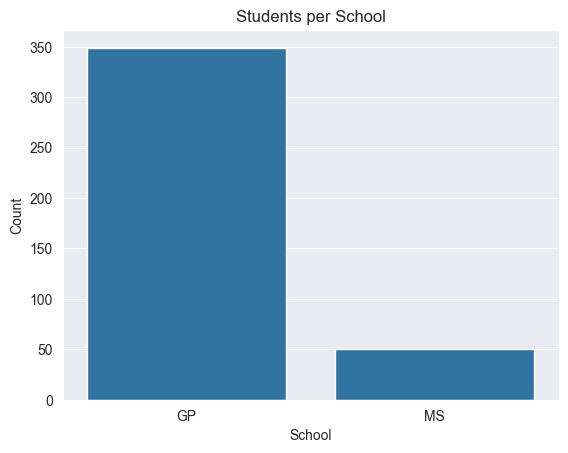

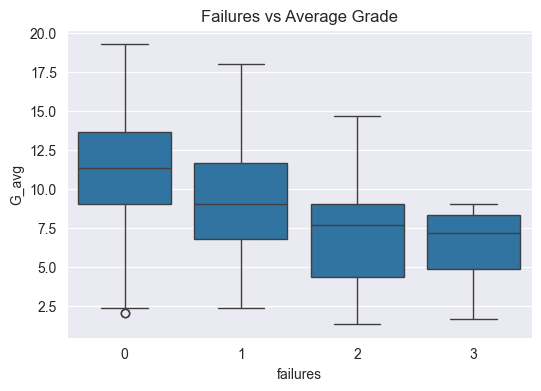

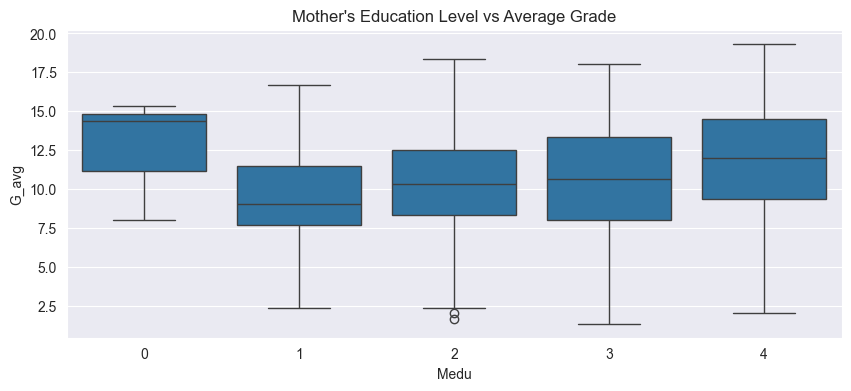

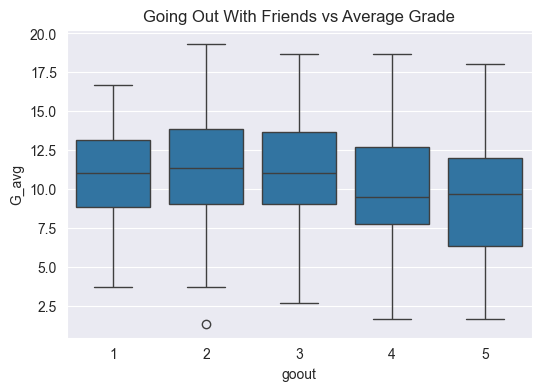

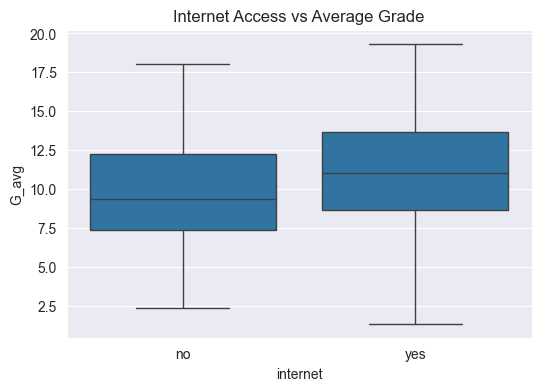

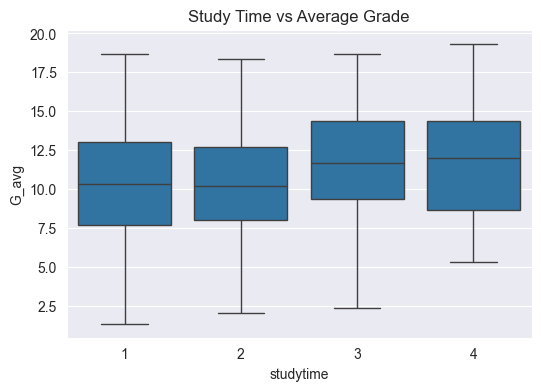

In [87]:
# School vis
plt.figure()
sns.countplot(data=data, x="school")
plt.title("Students per School")
plt.xlabel("School")
plt.ylabel("Count")
plt.show()

# Failures vis
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, x='failures', y='G_avg')
plt.title('Failures vs Average Grade')
plt.show()
# Mother's education vis
plt.figure(figsize=(10, 4))
sns.boxplot(data=data, x='Medu', y='G_avg')
plt.title('Mother\'s Education Level vs Average Grade')
plt.show()
# Go out vis
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, x='goout', y='G_avg')
plt.title('Going Out With Friends vs Average Grade')
plt.show()
# Internet access vis
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, x='internet', y='G_avg')
plt.title('Internet Access vs Average Grade')
plt.show()
# Study time vis
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, x='studytime', y='G_avg')
plt.title('Study Time vs Average Grade')
plt.show()

# Features to prune

Features correlation with high correlation to each other:

Dalc (-0.07), Walc (-0.09): Correlation to each other is 0.65

Medu (0.21), Fedu (0.16): Correlation to each other is 0.63

goout (-0.14), Walc (-0.09): Correlation to each other is 0.42

|goout| > |Walc| > |Dalc|

|Medu| > |Fedu|

Remove: Dalc, Walc, Fedu

#  Features to use in simpler model

Features most correlated with G_avg (>|0.1|):

failures     -0.369775

Medu          0.211609

goout        -0.144139

age          -0.142330

studytime     0.134396

traveltime   -0.121601

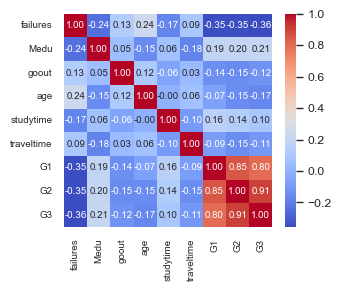

In [48]:
full_dataset = pd.read_csv("Math-Students.csv", sep=",")

# grades = ['G1', 'G2', 'G3']
# full_dataset['G_avg'] = full_dataset[grades].mean(axis=1)
# full_dataset = full_dataset.drop(columns=grades)

best_features = ['failures', 'Medu', 'goout', 'age', 'studytime', 'traveltime', 'G1', 'G2']
simple_dataset = full_dataset[best_features + ['G3']]
simple_dataset = pd.get_dummies(simple_dataset, drop_first=True)
correlation_matrix = simple_dataset.corr()

sns.set_theme(style='white')
sns.set_context("paper")
plt.figure(figsize=(3.5, 3))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 7})
plt.title('', fontsize=10)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

plt.tight_layout()
plt.savefig('CorrelationMatrix.pdf', dpi=300, bbox_inches='tight')
plt.show()

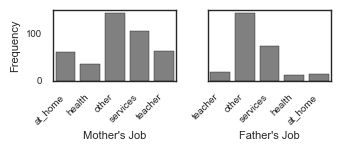

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv("Math-Students.csv", sep=",")

# Set style
sns.set_theme(style='white')
sns.set_context("paper")

# Create figure
plt.figure(figsize=(3.5, 1.6))

# Mother's job
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='Mjob', color='gray', edgecolor='k', linewidth=0.3)
plt.xlabel('Mother\'s Job', fontsize=8)
plt.ylabel('Frequency', fontsize=8)
plt.title('', fontsize=9)
plt.xticks(rotation=45, ha='right', fontsize=7)
plt.yticks(fontsize=7)

# Father's job
plt.subplot(1, 2, 2)
sns.countplot(data=data, x='Fjob', color='gray', edgecolor='k', linewidth=0.3)
plt.xlabel('Father\'s Job', fontsize=8)
plt.ylabel('')
plt.title('', fontsize=9)
plt.xticks(rotation=45, ha='right', fontsize=7)
plt.yticks([])  # hide redundant y-axis ticks

plt.tight_layout()
plt.savefig('ParentJobs_Distribution.pdf', dpi=300, bbox_inches='tight')
plt.show()


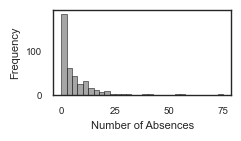

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv("Math-Students.csv", sep=",")

# Set style
sns.set_theme(style='white')
sns.set_context("paper")

# Plot absences distribution
plt.figure(figsize=(2.5, 1.5))
sns.histplot(data['absences'], bins=30,
             color='gray', edgecolor='k', linewidth=0.4, alpha=0.7)

plt.xlabel('Number of Absences', fontsize=8)
plt.ylabel('Frequency', fontsize=8)
plt.title('', fontsize=10)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

plt.tight_layout()
plt.savefig('Absences_Distribution.pdf', dpi=300, bbox_inches='tight')
plt.show()


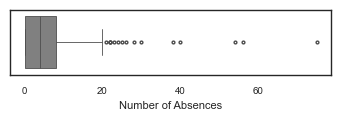

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv("Math-Students.csv", sep=",")

# Set style
sns.set_theme(style='white')
sns.set_context("paper")

# Plot boxplot for absences
plt.figure(figsize=(3.5, 1.3))
sns.boxplot(x='absences', data=data, color='gray', linewidth=0.6, fliersize=2)

plt.xlabel('Number of Absences', fontsize=8)
plt.ylabel('', fontsize=8)
plt.xticks(fontsize=7)
plt.yticks([])  # no y-axis since it's just one box
plt.title('', fontsize=10)

plt.tight_layout()
plt.savefig('Absences_Boxplot.pdf', dpi=300, bbox_inches='tight')
plt.show()
